# 机器学习练习 4 - 神经网络

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import minimize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os

In [22]:
np.random.seed()
data = loadmat('ex4data1.mat')
X = data['X']
y = data['y']
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X = X.sample(n=500, replace=False, random_state=1, axis=0)
y = y.sample(n=500, replace=False, random_state=1, axis=0)
hidden_num = 25
alpha = 1

In [23]:
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y = y_onehot  
y.shape

(500, 10)

In [24]:
theta = (np.random.random(size = hidden_num * (X.shape[1] + 1) + y.shape[1] * (hidden_num + 1)) - 0.5) * 0.25

In [25]:
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    a3 = sigmoid(z3)
    
    return a1, z2, a2, z3, a3

# Backpropagation

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoidDerivative(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))
    

In [27]:
def cost(theta, X, y, hidden_num, alpha):
    
    '''
    Matrixing
    '''
    m = len(X)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)

    '''
    Expanding theta
    '''
    theta1 = np.reshape(theta[:, :hidden_num * (X.shape[1] + 1)], (hidden_num, X.shape[1] + 1)) #(25, 401)
    theta2 = np.reshape(theta[:, hidden_num * (X.shape[1] + 1):], (y.shape[1] , (hidden_num + 1)))#(10, 26)

    '''
    Forward Propagation
    '''
    z1 = X #(500, 400)
    a1 = np.insert(z1, 0, values=np.ones(X.shape[0]), axis=1)#(500, 401)
    z2 = a1 * theta1.T
    a2 = sigmoid(z2)
    a2 = np.insert(a2, 0, values=np.ones(X.shape[0]), axis=1)#(500, 26)
    z3 = a2 * theta2.T
    a3 = sigmoid(z3) #(500, 10)
    '''
    Cost Function
    '''
    J = 0
    for i in range(len(X)):
        first_term = np.multiply(-y[i,:], np.log(a3[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - a3[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / len(X)
    return J

In [28]:
def BP(theta, X, y, hidden_num, alpha):

    '''
    Matrixing
    '''
    m = len(X)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)

    '''
    Expanding theta
    '''
    theta1 = np.reshape(theta[:, :hidden_num * (X.shape[1] + 1)], (hidden_num, X.shape[1] + 1)) #(25, 401)
    theta2 = np.reshape(theta[:, hidden_num * (X.shape[1] + 1):], (y.shape[1] , (hidden_num + 1)))#(10, 26)


    '''
    Forward Propagation
    '''
    z1 = X #(500, 400)
    a1 = np.insert(z1, 0, values=np.ones(X.shape[0]), axis=1)#(500, 401)
    z2 = a1 * theta1.T
    a2 = sigmoid(z2)
    a2 = np.insert(a2, 0, values=np.ones(X.shape[0]), axis=1)#(500, 26)
    z3 = a2 * theta2.T
    a3 = sigmoid(z3) #(500, 10)
    # '''
    # Cost Function
    # '''
    # # cos =np.multiply(-y, np.log(sigmoid(a3))) - np.multiply((1 - y), np.log(1 - sigmoid(a3)))
    # # reg = np.sum(np.power(theta2, 2)) * (alpha / (2 * len(a2))) + np.sum(np.power(theta1, 2)) * (alpha / len(z1))
    # # Cost = np.sum(cos) / len(X) + reg
    # J = 0
    # for i in range(len(X)):
    #     first_term = np.multiply(-y[i,:], np.log(a3[i,:]))
    #     second_term = np.multiply((1 - y[i,:]), np.log(1 - a3[i,:]))
    #     J += np.sum(first_term - second_term)
    
    # J = J / len(X)
    
    '''
    BackPropagation
    '''
    delta1 = np.zeros((hidden_num, X.shape[1] + 1)) #(25, 401)
    delta2 = np.zeros((y.shape[1], hidden_num + 1)) #(10, 26)

    for i in range(X.shape[0]):
        y_i = y[i, :]
        a1i = a1[i, :]
        a2i = a2[i, :]
        a3i = a3[i, :]
        z2i = np.insert(z2[i, :], 0, values=np.ones(1), axis=1) #(1, 26)

        d3 = a3i - y_i #(1, 10)
        d2 = np.multiply((theta2.T * d3.T).T, sigmoidDerivative(z2i)) #(1, 26)
        d2 = d2[:, 1:]
    

        delta1 += (d2.T * a1i)
        delta2 += (d3.T * a2i)

    delta1 = delta1 / len(X) #(25, 401) 
    delta2 = delta2 / len(X) #(10, 26)

    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * alpha) / len(X)
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * alpha) / len(X)

    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2))) #25 * 401 + 10 * 26
    
    return grad



In [29]:
grad = BP(theta, X, y, hidden_num, alpha)
grad


array([-6.98545342e-03,  5.39994533e-05, -1.90633302e-04, ...,
        2.15373736e-01,  1.39521184e-01,  2.05046784e-01])

In [30]:
def gradientDescent(X, y, hidden_num, theta, epochs, alpha):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)

    theta1 = np.reshape(theta[:, :hidden_num * (X.shape[1] + 1)], (hidden_num, X.shape[1] + 1)) #(25, 401)
    theta2 = np.reshape(theta[:, hidden_num * (X.shape[1] + 1):], (y.shape[1] , (hidden_num + 1)))#(10, 26)

    for i in range(epochs):
        grad = BP(theta, X, y, hidden_num, alpha)
        theta -= grad * alpha
        if i % 50 ==0:
            print(cost(theta, X, y, hidden_num, alpha))
        else:
            cost(theta, X, y, hidden_num, alpha)
   
    return theta

In [31]:
# fmin = minimize(fun=BP, x0=theta, args=(X, y, hidden_num, alpha), method='TNC', jac=True, options={'maxiter':250})
# fmin
#Cost函数出大问题
# If jac is a Boolean and is True, fun is assumed to return and objective and gradient as an (f, g) tuple.

In [32]:
theta = gradientDescent(X, y, hidden_num, theta, 500, alpha)


3.5021479902852564
1.8217200845257457
1.088959792195444
0.7963021588159752
0.6401118744348182
0.5461844734079131
0.48499178849937286
0.44264312809761763
0.41222434251200735
0.3898587370696656


In [33]:
X = np.matrix(X)
theta = np.matrix(theta)

theta1 = np.matrix(np.reshape(theta[:, :hidden_num * (X.shape[1] + 1)], (hidden_num, X.shape[1] + 1)))
theta2 = np.matrix(np.reshape(theta[:, hidden_num * (X.shape[1] + 1):], (y.shape[1] , (hidden_num + 1))))
print(theta1.shape, theta2.shape)

a1, z2, a2, z3, a3 = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(a3, axis=1) + 1)
y_pred.shape

(25, 401) (10, 26)


(500, 1)

In [34]:
y = pd.DataFrame(data['y'])
y = y.sample(n=500, replace=False, random_state=1, axis=0)
y = np.array(y)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 99.0%


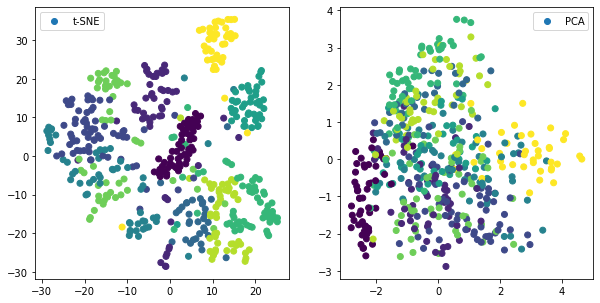

In [37]:
X_tsne = TSNE(n_components=2, random_state=True).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

ckpt_dir = "images"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, label="t-SNE")
plt.legend()
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, label="PCA")
plt.legend()
plt.savefig('images/digits_tsne-pca1.png', dpi=120)
plt.show()